# 1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# 2 Data

In [2]:
import pandas as pd
df = pd.read_csv("Salary.csv")

# 3. EDA 

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [4]:
print("Dataset Information:\n")
df.info()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [5]:
df.shape

(6684, 9)

In [6]:
print("Unique Values:")
print(df.nunique())

Unique Values:
Age                     41
Gender                   2
Education Level          4
Job Title              129
Years of Experience     37
Salary                 437
Country                  5
Race                    10
Senior                   2
dtype: int64


In [7]:
df.isnull().sum() 

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

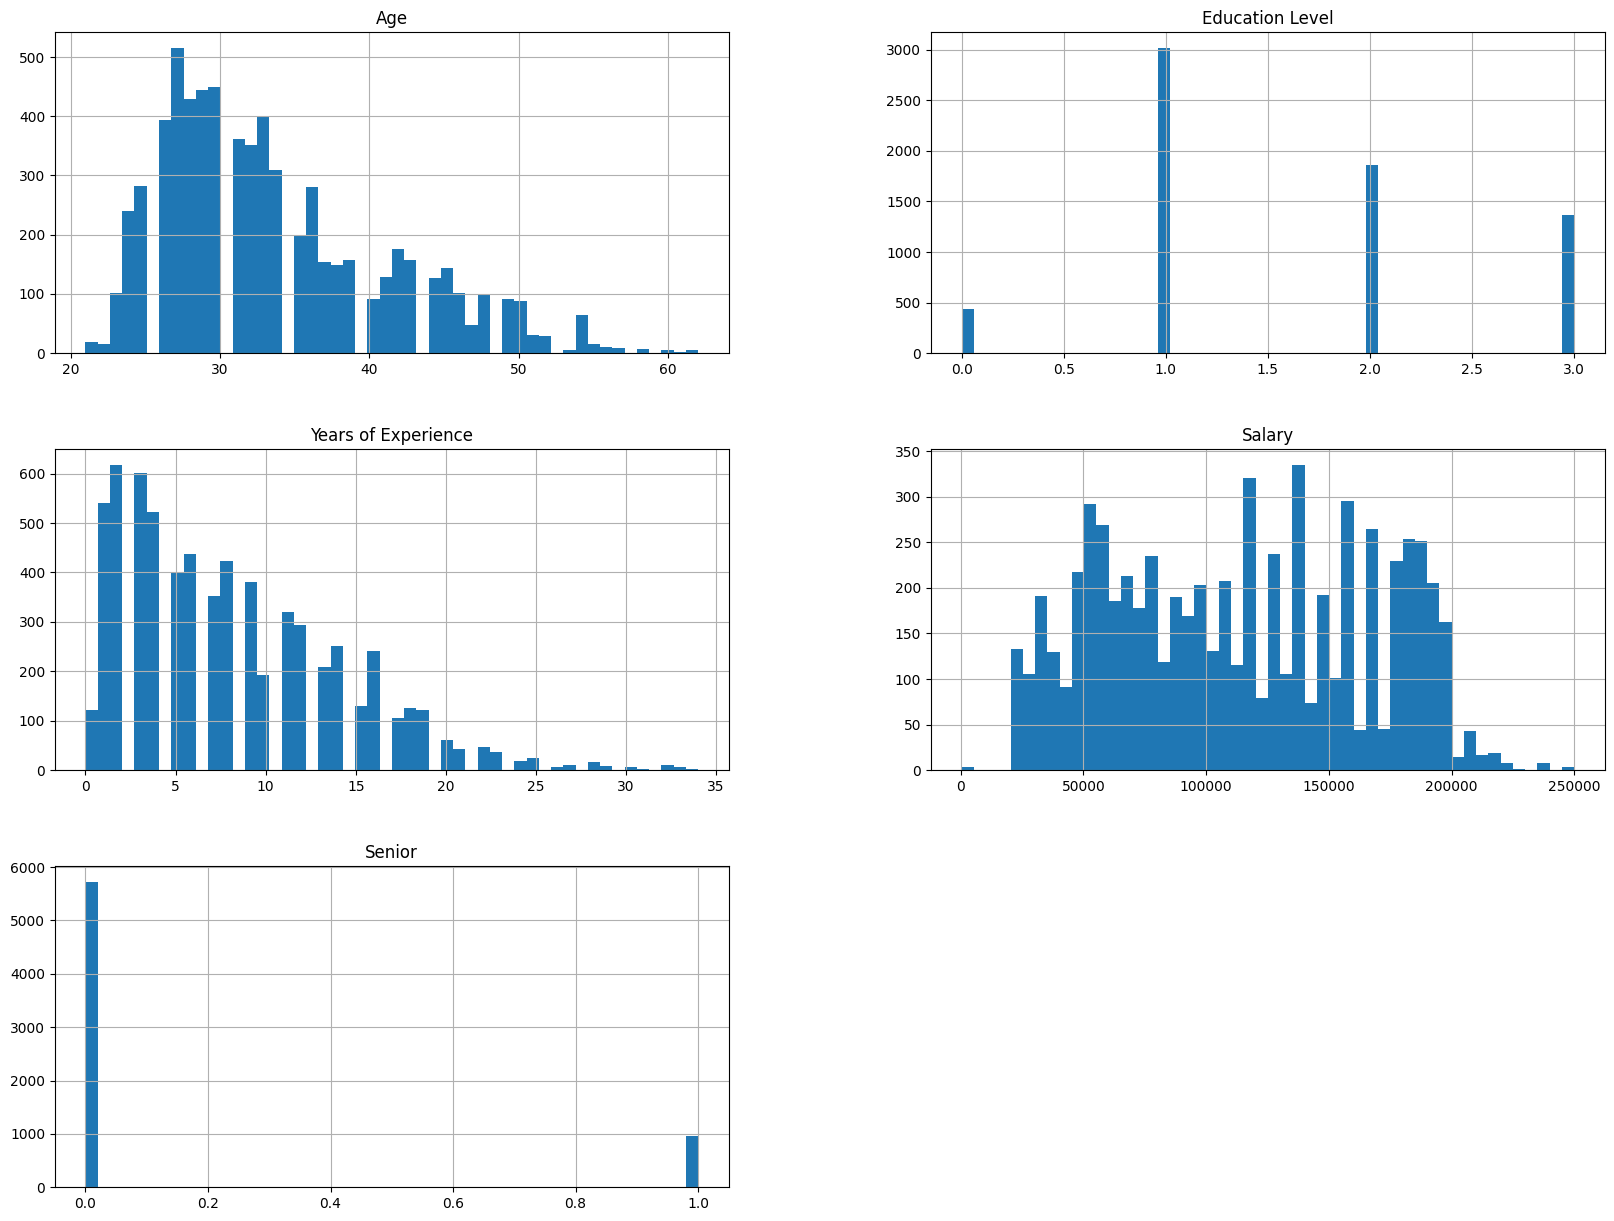

In [8]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

# 3.1 Categorical Data Distribution

In [9]:
categorical_columns = df.select_dtypes(include=['object', 'category'])

In [10]:
categorical_columns

,Gender,Job Title,Country,Race
0,Male,Software Engineer,UK,White
1,Female,Data Analyst,USA,Hispanic
2,Male,Manager,Canada,White
3,Female,Sales Associate,USA,Hispanic
4,Male,Director,USA,Asian
...,...,...,...,...
6679,Female,Director of Marketing,UK,Mixed
6680,Male,Sales Associate,Australia,Australian
6681,Female,Financial Manager,China,Chinese
6682,Male,Marketing Manager,China,Korean


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [12]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,1,1,112,5.0,90000.0,3,9,0
1,28.0,0,2,24,3.0,65000.0,4,5,0
2,45.0,1,3,72,15.0,150000.0,1,9,1
3,36.0,0,1,100,7.0,60000.0,4,5,0
4,52.0,1,2,34,20.0,200000.0,4,1,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,0,3,42,20.0,200000.0,3,7,0
6680,32.0,1,0,100,3.0,50000.0,0,2,0
6681,30.0,0,1,51,4.0,55000.0,2,4,0
6682,46.0,1,2,76,14.0,140000.0,2,6,0


# 3.3. Correlation Analysis

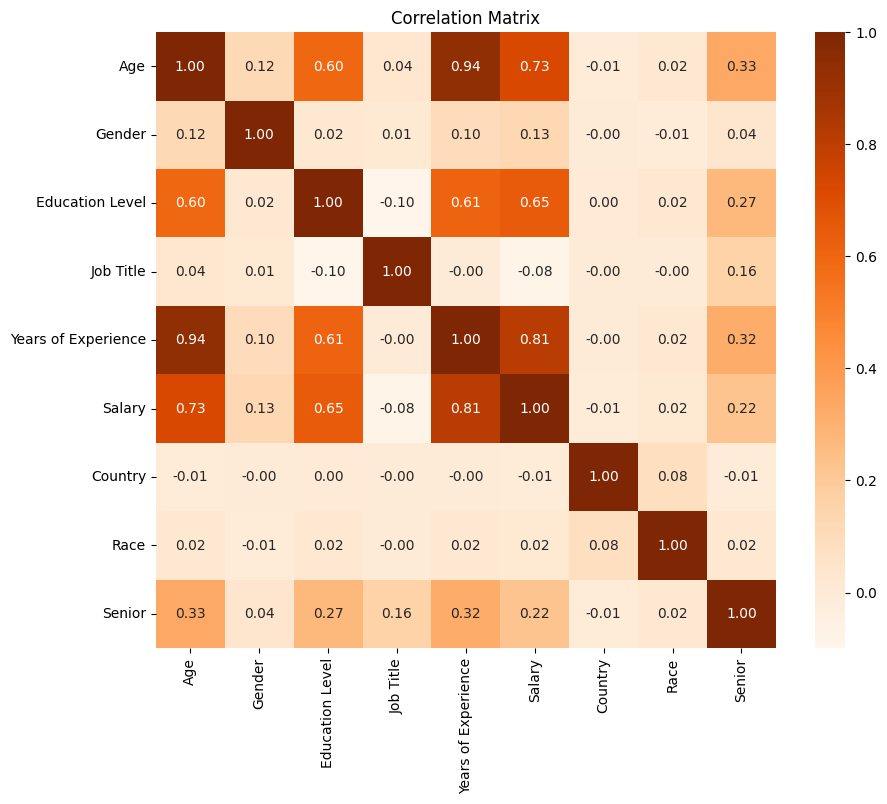

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Oranges', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
df.describe()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,0.549222,1.622382,72.686864,8.077723,115307.175194,2.007780,4.869390,0.143477
std,7.595994,0.497609,0.880474,34.129358,6.029305,52806.810881,1.416941,3.386053,0.350585
min,21.000000,0.000000,0.000000,0.000000,0.000000,350.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,51.000000,3.000000,70000.000000,1.000000,1.000000,0.000000
50%,32.000000,1.000000,1.000000,76.000000,7.000000,115000.000000,2.000000,5.000000,0.000000
75%,38.000000,1.000000,2.000000,103.000000,12.000000,160000.000000,3.000000,9.000000,0.000000
max,62.000000,1.000000,3.000000,128.000000,34.000000,250000.000000,4.000000,9.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   int64  
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   int64  
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   int64  
 7   Race                 6684 non-null   int64  
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 470.1 KB


In [16]:
df.drop(["Gender","Age"], axis=1,inplace=True)  

In [17]:
df

,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,1,112,5.0,90000.0,3,9,0
1,2,24,3.0,65000.0,4,5,0
2,3,72,15.0,150000.0,1,9,1
3,1,100,7.0,60000.0,4,5,0
4,2,34,20.0,200000.0,4,1,0
...,...,...,...,...,...,...,...
6679,3,42,20.0,200000.0,3,7,0
6680,0,100,3.0,50000.0,0,2,0
6681,1,51,4.0,55000.0,2,4,0
6682,2,76,14.0,140000.0,2,6,0


# 4.Data Splitting

In [18]:
x = df.drop(['Salary'], axis=1)
y = df['Salary']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 5. StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6 XGBRegressor  Model Training and Evaluation

In [21]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
xgboost_model = xgb.XGBRegressor()

xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_test)

mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)

print("XGBoost Regressor:")
print(f"Mean Squared Error (MSE): {mse_xgboost:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgboost:.2f}")
r2 = r2_score(y_test, y_pred_xgboost)
print(f"R-squared (R2) score: {r2:.2f}")


XGBoost Regressor:
Mean Squared Error (MSE): 168898163.01
Root Mean Squared Error (RMSE): 12996.08
R-squared (R2) score: 0.94


# 6.2 RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [23]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)
y_pred_random_forest = random_forest_regressor.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {mse_random_forest:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_random_forest:.2f}")
print(f"R-squared (R2): {r2_random_forest:.2f}")


Random Forest Regressor:
Mean Squared Error (MSE): 199081597.11
Root Mean Squared Error (RMSE): 14109.63
R-squared (R2): 0.93


# 6.3 DecisionTreeRegressor

In [24]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_regressor.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {mse_decision_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_decision_tree:.2f}")
print(f"R-squared (R2): {r2_decision_tree:.2f}")


Decision Tree Regressor:
Mean Squared Error (MSE): 281262826.83
Root Mean Squared Error (RMSE): 16770.89
R-squared (R2): 0.90


# 6.4 LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_linear = linear_regression.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R-squared (R2): {r2_linear:.2f}")


Linear Regression:
Mean Squared Error (MSE): 841926755.95
Root Mean Squared Error (RMSE): 29015.97
R-squared (R2): 0.70
